# Explore here

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv', sep=';')
total_data.head()




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
import pandas as pd
import numpy as np

# Cargar dataset
total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv', sep=';')

# Definición de condiciones para la columna 'label'
conditions = [
    total_data['quality'].isin([3, 4]),
    total_data['quality'].isin([5, 6]),
    total_data['quality'].isin([7, 8])
]

# Valores correspondientes para cada condición
values = [0, 1, 2]

# Crear la columna 'label' usando np.select
total_data['label'] = np.select(conditions, values, default=-1)

# Opcional: mostrar primeros registros para verificar
print(total_data[['quality', 'label']].head(10))



   quality  label
0        5      1
1        5      1
2        5      1
3        6      1
4        5      1
5        5      1
6        5      1
7        7      2
8        7      2
9        5      1


In [6]:
total_data.drop(["quality"], axis = 1, inplace = True)
total_data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
1084,7.2,0.38,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.5,1
655,9.7,0.55,0.17,2.9,0.087,20.0,53.0,1.00040,3.14,0.61,9.4,1
1108,8.1,0.78,0.10,3.3,0.090,4.0,13.0,0.99855,3.36,0.49,9.5,1
1198,7.7,0.26,0.26,2.0,0.052,19.0,77.0,0.99510,3.15,0.79,10.9,1
1402,7.6,0.30,0.42,2.0,0.052,6.0,24.0,0.99630,3.44,0.82,11.9,1
134,7.9,1.04,0.05,2.2,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,1
973,8.5,0.34,0.44,1.7,0.079,6.0,12.0,0.99605,3.52,0.63,10.7,1
1075,9.1,0.25,0.34,2.0,0.071,45.0,67.0,0.99769,3.44,0.86,10.2,2
516,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.9,1
1186,6.6,0.80,0.03,7.8,0.079,6.0,12.0,0.99630,3.52,0.50,12.2,1


In [7]:
X = total_data.drop("label", axis = 1)
y = total_data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [8]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [9]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.815625

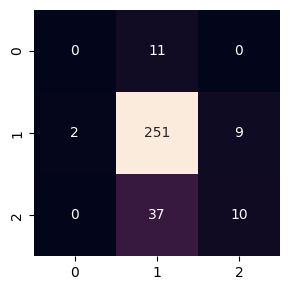

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

bank_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [14]:
## Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.84      0.96      0.89       262
           2       0.53      0.21      0.30        47

    accuracy                           0.82       320
   macro avg       0.46      0.39      0.40       320
weighted avg       0.76      0.82      0.78       320



KNN para regresión

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,0.218332,0.889712,0.192092,0.309726,-0.049642,0.691007,1.042934,1.846696,1.093500,0.458223,1.123177
354,-1.290166,-1.788783,0.652753,-0.805080,-0.455214,2.388473,3.593870,-3.004491,-0.400439,-0.401197,1.408272
342,1.494753,-0.784347,1.011045,-0.526378,0.599272,-0.957960,-0.991742,0.768655,-0.075669,0.515517,-0.587390
834,0.276351,0.861811,-0.063831,-0.665729,-0.009085,0.012020,-0.718427,0.089488,0.054238,-1.088733,-0.967516
705,0.044274,2.814880,-0.626861,2.399985,-0.313264,-0.472970,0.222990,1.199871,0.379008,-0.974144,-0.492358


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,0.362832,0.390411,0.31,0.143836,0.123539,0.328358,0.265018,0.743759,0.582677,0.226994,0.492308
354,0.132743,0.061644,0.40,0.034247,0.090150,0.589552,0.561837,0.082966,0.401575,0.134969,0.538462
342,0.557522,0.184932,0.47,0.061644,0.176962,0.074627,0.028269,0.596916,0.440945,0.233129,0.215385
834,0.371681,0.386986,0.26,0.047945,0.126878,0.223881,0.060071,0.504405,0.456693,0.061350,0.153846
705,0.336283,0.626712,0.15,0.349315,0.101836,0.149254,0.169611,0.655653,0.496063,0.073620,0.230769


In [ ]:
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples = 1000, n_features = 11, noise = 1, random_state = 42)
X = pd.DataFrame(X, columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
29,-1.438720,-1.226179,1.089537,0.767479,0.192652,-2.378432,0.962503,2.365408,2.196646,-0.225263,-0.001714
535,0.551476,0.818778,1.017661,-1.122545,-1.326472,0.390696,-1.148263,0.271495,1.537932,0.340589,-0.917503
695,0.339356,-0.306014,0.144326,-0.703710,-0.368619,-0.074927,-0.761588,-2.703348,0.145427,-0.348157,1.692347
557,-2.245586,0.948143,-0.095341,-1.236478,-0.353264,1.918606,0.621347,1.730322,-0.305954,0.195403,1.274440
836,-0.388480,-0.377531,-0.458137,-0.533452,-0.171179,0.333965,1.104997,-0.095148,1.257613,-0.216001,-1.026625


In [ ]:
y_train

array([ 2.61945460e+01,  2.38477728e+02, -9.37300556e+00,  6.94811166e+01,
       -9.69565828e+01, -5.05984403e+02, -1.13270634e+02, -1.77244848e+02,
        6.03117957e+01,  4.24320684e+01,  3.88768035e+01,  1.91229891e+02,
       -2.03193644e+02, -2.09911290e+02, -2.31586539e+02,  2.24372000e+02,
        3.05817930e+01,  2.81387065e+02, -1.19814098e+02,  9.27802602e+01,
       -1.21167859e+01,  7.36213110e+01,  6.98009737e+01, -1.52072208e+02,
        4.75639569e+00,  8.79459189e+01, -7.58186043e+00,  9.23388788e+01,
       -4.41948622e+02,  2.78701100e+01,  1.34958495e+02, -1.44471503e+02,
        2.53690928e+02, -2.88169969e+02, -1.16331576e+01,  2.02262887e+02,
       -3.32283333e+01,  2.05911515e+02,  1.02493457e+02,  2.08892021e+02,
       -3.93250871e+01, -3.26892884e+01,  1.80853445e+02,  3.74926203e+01,
        4.15988930e+01,  6.89325632e+01, -7.00239500e+01,  4.34642755e+01,
       -2.18622078e+02, -3.86484776e+02, -4.45089341e+02,  5.04714564e+01,
       -1.26147703e+02, -

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([-3.18597950e+01,  2.28618011e+02, -1.27709734e+02,  7.45995919e+01,
        4.25760678e+01, -1.09223016e+02,  1.91027490e+02, -1.60096856e+02,
        1.60107864e+02,  4.31681928e+01, -1.49925917e+01,  5.66534117e+01,
       -1.11500631e+01, -5.17802499e+00, -2.94503244e+01, -4.66420404e+01,
        7.16713881e+01,  5.61414287e+01,  5.03346288e+01, -1.92382778e+02,
        1.66232523e+02, -4.45137433e+01,  3.61916680e+01, -6.52348613e+01,
       -5.03390112e+01, -2.48190330e+02,  1.26810195e+02,  5.07244293e+01,
        5.16777785e+01, -4.52629705e+01, -2.28681399e+02,  1.79812126e+02,
       -1.21265481e+02,  6.67804556e+00,  1.53961735e+02, -1.06129024e+02,
        2.30016062e+01,  7.44507320e+01, -4.15680984e+01,  8.30618996e+01,
       -2.47769906e+02, -4.31787646e+00, -2.18034211e+02,  2.92007086e+02,
       -8.61602013e+01,  1.03912231e+02, -2.23366268e+02,  1.86438430e+02,
       -1.88647412e+00,  1.16092684e+02, -1.93364769e+02, -6.54431338e+00,
       -2.27273076e+02,  

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Raíz del Error cuadrático medio: 90.99884539258508
Error cuadrático medio: 8280.789862783602
Coefficient of determination: 0.7405168574070884


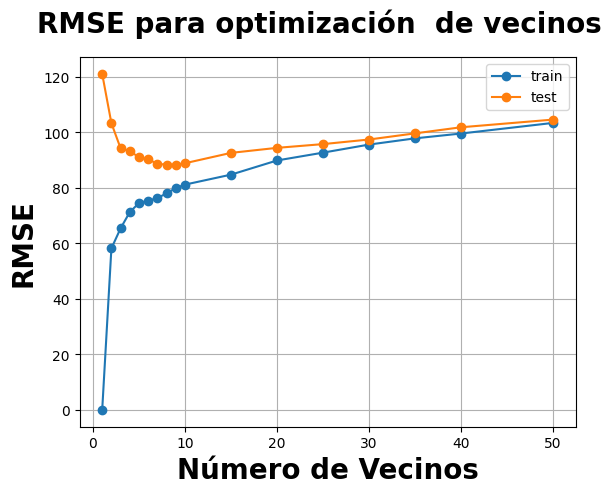

In [ ]:
# Optimización de para los vecinos, con el fin de elegir un hiperpárametro que mejore el modelo con el rmse
import matplotlib.pyplot as plt
import seaborn as sns
lista_rmse_train = []
lista_rmse_test = []

#Valores de vecinos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]


for k in k_vecinos:

    model_hiper = KNeighborsRegressor(n_neighbors=k)
    model_hiper.fit(X_train,y_train)

    y_train_pred = model_hiper.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    y_test_pred = model_hiper.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.suptitle('RMSE para optimización  de vecinos' , fontweight = 'black', fontsize=20)
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel('Número de Vecinos',fontsize=20,fontweight = 'black')
plt.ylabel('RMSE',fontsize=20,fontweight = 'black');


In [ ]:
model_ideal = KNeighborsRegressor(n_neighbors=8)
model_ideal.fit(X_train, y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
y_pred_ideal = model_ideal.predict(X_test)

In [ ]:
print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred_ideal))}")
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_ideal)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred_ideal)}")

Raíz del Error cuadrático medio: 88.36001916382169
Error cuadrático medio: 7807.492986630936
Coefficient of determination: 0.7553478774955777


In [ ]:
dump(model_ideal, open("knn_regressor_default.sav", "wb"))

Optimización automatica

In [ ]:
from sklearn.model_selection import GridSearchCV


knn =  KNeighborsRegressor()


param_grid = {
    'n_neighbors': list(range(1, 12)),
    'metric': ['euclidean', 'manhattan', 'minkowski']}


# GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': [1, 2, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,7


In [ ]:
# Mejores parámetros

grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 7}

In [ ]:
## Ideal model
knn_model_best =  KNeighborsRegressor(**grid_search.best_params_)
knn_model_best.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [ ]:
##
y_pred_grid = knn_model_best.predict(X_test)

In [ ]:
print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred_grid))}")
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_grid)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred_grid)}")

Raíz del Error cuadrático medio: 88.6731712440281
Error cuadrático medio: 7862.93129847273
Coefficient of determination: 0.7536106872498252
